In [ ]:
import numpy as np
import pandas as pd

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d brsdincer/vehicle-detection-image-set

 96% 114M/119M [00:01<00:00, 110MB/s]  
100% 119M/119M [00:01<00:00, 107MB/s]


In [ ]:
!unzip "/content/vehicle-detection-image-set.zip" -d "/content/vehicle-detection dataset"

Archive:  /content/vehicle-detection-image-set.zip
replace /content/vehicle-detection dataset/data/non-vehicles/extra1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
maindir = "/content/vehicle-detection dataset/data"
os.listdir(maindir)

['non-vehicles', 'vehicles']

In [ ]:
import os
vehicle_dir = "/content/vehicle-detection dataset/data/vehicles"
nonvehicle_dir = "/content/vehicle-detection dataset/data/non-vehicles"
vehicle = os.listdir(maindir+"/vehicles")
non_vehicle = os.listdir(maindir+"/non-vehicles")
print(f"Number of Vehicle Images: {len(vehicle)}")
print(f"Number of Non Vehicle Images: {len(non_vehicle)}")


Number of Vehicle Images: 8792
Number of Non Vehicle Images: 8968


In [ ]:
#non_vehicle1 = non_vehicle[:len(vehicle)]
#print(f"Number of Non Vehicle Images: {len(non_vehicle1)}")

In [ ]:
import matplotlib.pyplot as plt

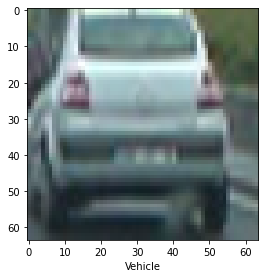

In [ ]:
import cv2
import matplotlib.pyplot as plt
vehicle_img = np.random.choice(vehicle,5)
img = cv2.imread(vehicle_dir+'/'+vehicle_img[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.xlabel("Vehicle")
plt.tight_layout()
plt.imshow(img)
plt.show()

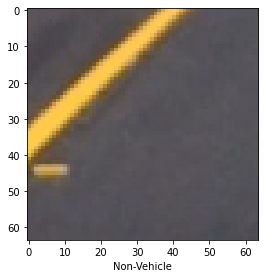

In [ ]:
import cv2
import matplotlib.pyplot as plt
nonvehicle_img = np.random.choice(non_vehicle,5)
img = cv2.imread(nonvehicle_dir+'/'+nonvehicle_img[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.xlabel("Non-Vehicle")
plt.tight_layout()
plt.imshow(img)
plt.show()

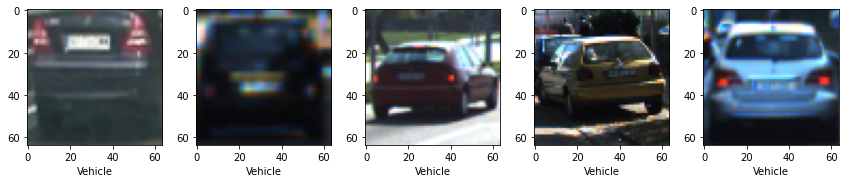

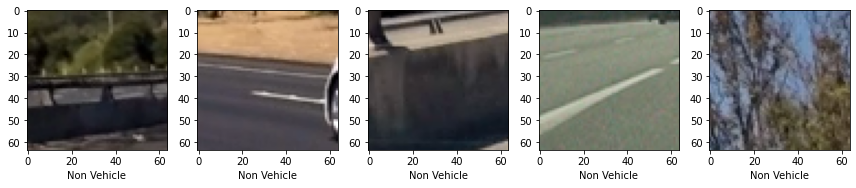

In [ ]:
plt.figure(figsize=(12,9))
import cv2
vehicle_img = np.random.choice(vehicle,5)
nonvehicle_img = np.random.choice(non_vehicle,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    img = cv2.imread(vehicle_dir+'/'+vehicle_img[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel("Vehicle")
    plt.tight_layout()
    plt.imshow(img)
plt.show()
plt.figure(figsize=(12,9)) 
for i in range(5):
    plt.subplot(1,5,i+1)
    img = cv2.imread(nonvehicle_dir+'/'+nonvehicle_img[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel("Non Vehicle")
    plt.imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
train = []
test = []
import tqdm
from tensorflow.keras.preprocessing import image

for i in tqdm.tqdm(vehicle):
    img = cv2.imread(vehicle_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    train.append(img)
    test.append("Vehicle")
    
for i in tqdm.tqdm(non_vehicle):
    img = cv2.imread(nonvehicle_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    train.append(img)
    test.append("Non Vehicle")

100%|██████████| 8968/8968 [00:03<00:00, 2736.58it/s]


In [ ]:
train = np.array(train)
test = np.array(test)
train.shape,test.shape

((17760, 150, 150, 3), (17760,))

In [ ]:
train[:2]

array([[[[ 17,  21,  18],
         [ 17,  21,  18],
         [ 17,  20,  17],
         ...,
         [ 79,  61,  69],
         [ 78,  58,  71],
         [ 78,  57,  72]],

        [[ 17,  21,  18],
         [ 17,  21,  18],
         [ 17,  20,  17],
         ...,
         [ 80,  67,  72],
         [ 79,  65,  74],
         [ 79,  65,  75]],

        [[ 17,  20,  19],
         [ 17,  20,  19],
         [ 17,  19,  18],
         ...,
         [ 82,  85,  79],
         [ 83,  88,  82],
         [ 83,  89,  84]],

        ...,

        [[ 56,  47,  38],
         [ 55,  47,  38],
         [ 54,  47,  38],
         ...,
         [ 27,  25,  23],
         [ 29,  27,  23],
         [ 29,  27,  24]],

        [[ 58,  50,  40],
         [ 58,  50,  40],
         [ 56,  50,  40],
         ...,
         [ 28,  28,  25],
         [ 30,  29,  25],
         [ 30,  29,  25]],

        [[ 59,  51,  41],
         [ 59,  51,  41],
         [ 57,  51,  41],
         ...,
         [ 28,  28,  25],
        

In [ ]:
test

array(['Vehicle', 'Vehicle', 'Vehicle', ..., 'Non Vehicle', 'Non Vehicle',
       'Non Vehicle'], dtype='<U11')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test= le.fit_transform(test)

In [ ]:
from tensorflow.keras.utils import to_categorical
test = to_categorical(test)
print(test.shape)

(17760, 2)


In [ ]:
test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.utils import shuffle
train,test = shuffle(train, test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state = 50)

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  

In [ ]:
x_train.shape

(14208, 150, 150, 3)

In [ ]:
y_train.shape

(14208, 2)

In [ ]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(16, activation = tf.nn.relu))


model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax)) # Output layer

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10)

print("-----------------------------------------------------------------")

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

Epoch 1/10
444/444 [==============================] - 32s 68ms/step - loss: 61.6582 - accuracy: 0.7758
Epoch 2/10
444/444 [==============================] - 30s 68ms/step - loss: 17.9797 - accuracy: 0.8292
Epoch 3/10
444/444 [==============================] - 30s 68ms/step - loss: 6.5554 - accuracy: 0.8659
Epoch 4/10
444/444 [==============================] - 30s 68ms/step - loss: 5.5483 - accuracy: 0.8697
Epoch 5/10
444/444 [==============================] - 30s 69ms/step - loss: 1.4173 - accuracy: 0.9035
Epoch 6/10
444/444 [==============================] - 30s 68ms/step - loss: 3.9220 - accuracy: 0.8583
Epoch 7/10
444/444 [==============================] - 30s 68ms/step - loss: 1.1882 - accuracy: 0.8913
Epoch 8/10
444/444 [==============================] - 30s 68ms/step - loss: 0.3995 - accuracy: 0.9204
Epoch 9/10
444/444 [==============================] - 30s 68ms/step - loss: 1.2359 - accuracy: 0.9003
Epoch 10/10
444/444 [==============================] - 30s 68ms/step - loss: 0.5

In [ ]:
predictions = model.predict([x_test])
print(predictions)

Consider rewriting this model with the Functional API.
[[9.9977106e-01 2.2899786e-04]
 [9.9999976e-01 2.0207300e-07]
 [2.9948721e-02 9.7005129e-01]
 ...
 [1.9496134e-02 9.8050392e-01]
 [9.9718863e-01 2.8114312e-03]
 [2.3892388e-04 9.9976104e-01]]


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
y_test = np.argmax(y_test,axis=1)
y_test[:15]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

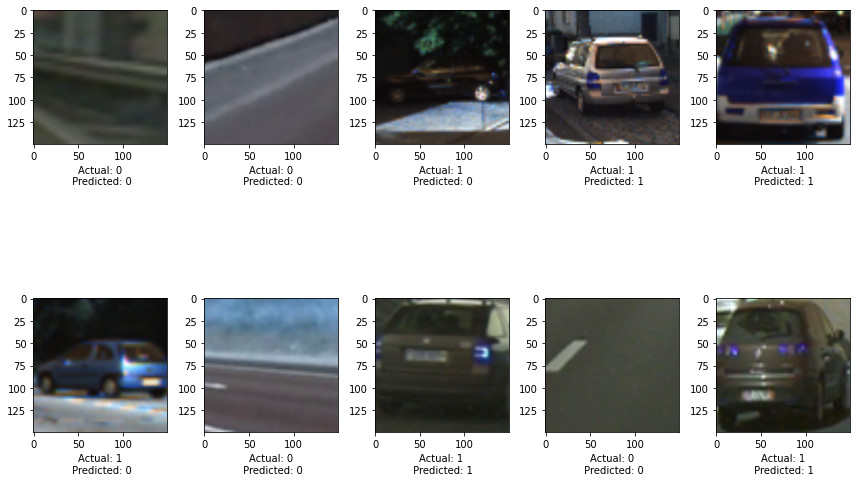

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = np.random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()